In [1]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct

In [2]:
noise_floor = -175

# Texual Data

In [27]:
# drone = pd.read_csv('data_drone_gain0', header=None, skip_blank_lines=False) #datasets/drone1/180_degrees
texual = pd.read_csv('datasets/test/test_normal', header=None, skip_blank_lines=False) #datasets/texual1/180_degrees
texual[0] = texual[0].str.replace("(", "")
texual[1] = texual[1].str.replace(")", "")

texual = texual.astype(float)
texual[2] = (texual[0]**2 + texual[1]**2) #power level of the 
texual[2] = 10*np.log10(texual[2]) #RSS

texual[3] = (texual.index / len(texual)) * 10

texual = texual.replace([np.inf, -np.inf], np.nan)
texual = texual.dropna(axis = 0, inplace=False)

texual = texual[texual[2] <= 0]
texual = texual[texual[2] >= noise_floor]

texual = texual.rename({0: 'i', 1: 'q', 2: 'rss', 3: 'time'}, axis=1)

/home/jos/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Binary


In [5]:
i_values = []
q_values = []

with open('datasets/test/test_binary_noise_only', 'rb') as file:
    while True:
        # Read 4 bytes (32 bits) from the file
        i = file.read(4)
        if not i:
            break

        q = file.read(4)
        if not 1:
            break

        # Unpack the binary data into a single float
        i = struct.unpack('f', i)[0]
        q = struct.unpack('f', q)[0]

        i_values.append(i)
        q_values.append(q)

binary = pd.DataFrame({'i': i_values, 'q': q_values})

binary['rss'] = 10*np.log10(binary['i']**2 + binary['q']**2) #RSS
binary['time'] = (binary.index / len(binary)) * 10

binary = binary.replace([np.inf, -np.inf], np.nan)
binary = binary.dropna(axis = 0, inplace=False)

binary = binary[binary['rss'] <= 0]
# binary = binary[binary['rss'] >= noise_floor]

/home/jos/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Plots

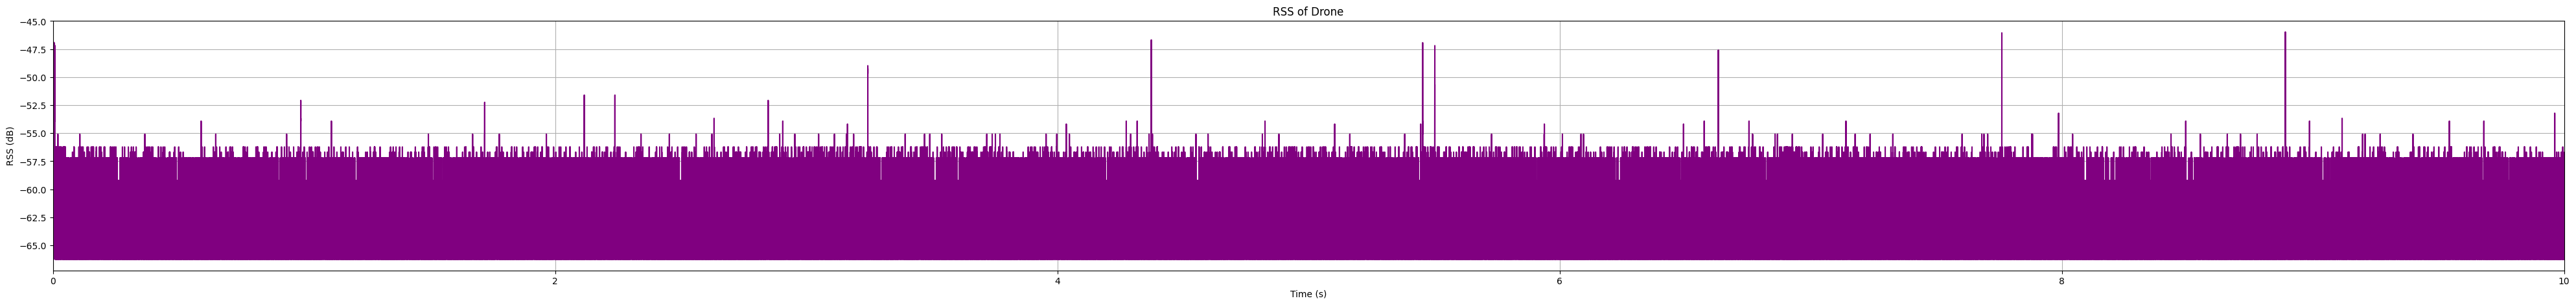

In [6]:
plt.figure(figsize=(50, 5))
# plt.plot(texual['time'], texual['rss'], color='red')
plt.plot(binary['time'], binary['rss'], color='purple')
# plt.plot(binary['time'], binary['rss'], color='red')
plt.title('RSS of Drone')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.ylabel('RSS (dB)')
plt.grid(True)
plt.show()

# Binary Noise

In [9]:
i_values = []
q_values = []

with open('datasets/test/test_binary_final', 'rb') as file:
    while True:
        # Read 4 bytes (32 bits) from the file
        i = file.read(4)
        if not i:
            break

        q = file.read(4)
        if not 1:
            break

        # Unpack the binary data into a single float
        i = struct.unpack('f', i)[0]
        q = struct.unpack('f', q)[0]

        i_values.append(i)
        q_values.append(q)

binary_noise = pd.DataFrame({'i': i_values, 'q': q_values})

In [34]:
binary_noise['rss'] = 10*np.log10(binary_noise['i']**2 + binary_noise['q']**2) #RSS
binary_noise['time'] = (binary_noise.index / len(binary_noise)) * 10

binary_noise = binary_noise.replace([np.inf, -np.inf], np.nan)
binary_noise = binary_noise.dropna(axis = 0, inplace=False)

binary_noise = binary_noise[binary_noise['rss'] <= 0]
binary_noise = binary_noise[binary_noise['rss'] >= noise_floor]

/home/jos/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


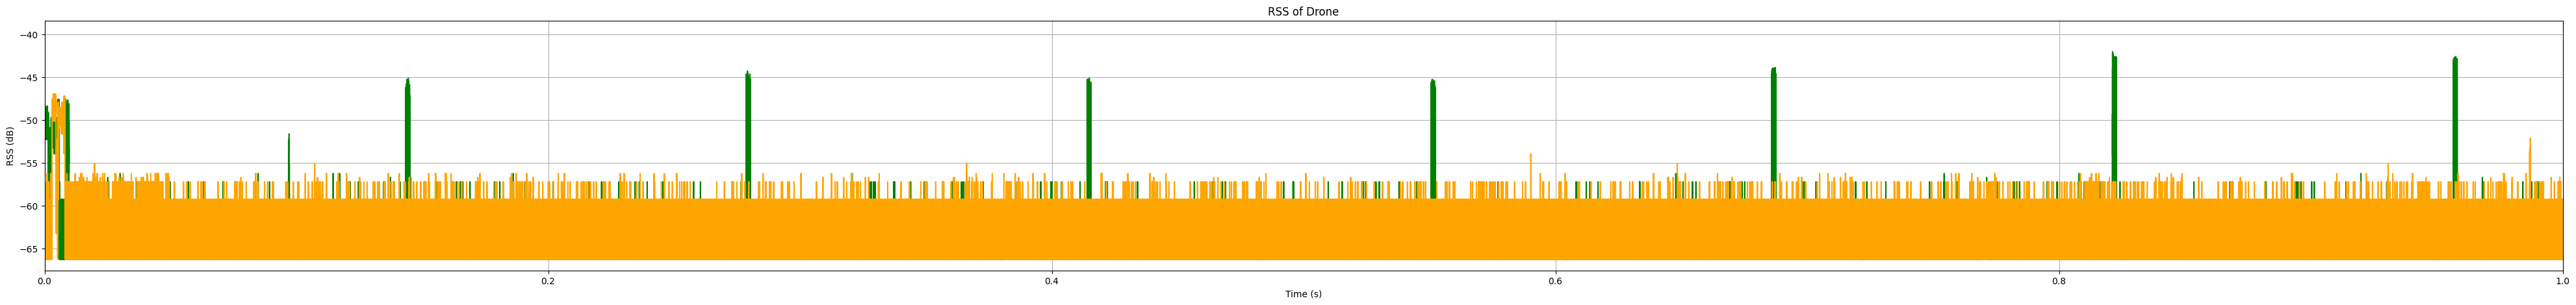

In [36]:
plt.figure(figsize=(50, 5))
# plt.plot(drone[3][:200], drone[2][:200])
# plt.plot(texual['time'], texual['rss'], color='red')
plt.plot(binary['time'], binary['rss'], color='green')
plt.plot(binary_noise['time'], binary_noise['rss'], color='orange')
plt.title('RSS of Drone')
plt.xlabel('Time (s)')
plt.xlim([0, 1])
plt.ylabel('RSS (dB)')
plt.grid(True)
plt.show()